In [1]:
import numpy as np
import pandas as pd



In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3939,0,Does daddy have a bb now.,NaN,NaN,NaN
4323,0,I am not having her number sir,NaN,NaN,NaN
2817,0,Thk some of em find wtc too far... Weiyi not g...,NaN,NaN,NaN
3083,0,Ok lor. I ned 2 go toa payoh 4 a while 2 retur...,NaN,NaN,NaN
323,0,That would be great. We'll be at the Guild. Co...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1.data cleaning
# 2. EDA
# 3. text preprocessing
# 4 model building
# 5 evaluation
# 6 improvement
# 7 website
# 8 deployment of website(on heroku 

##1 data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   int64 
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
1840,0,Yeah. I got a list with only u and Joanna if I...
777,0,\Hi its Kate it was lovely to see you tonight ...
1227,0,So Ì_'ll be submitting da project tmr rite?
143,0,I know you are. Can you pls open the back?
55,0,Do you know what Mallika Sherawat did yesterda...


In [9]:
# renaming cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2994,0,Mm not entirely sure i understood that text bu...
5411,0,I ask if u meeting da ge tmr nite...
2904,0,Ha. You don‰Û÷t know either. I did a a clever ...
1244,0,Now? I'm going out 4 dinner soon..
1336,0,"Sweet, we may or may not go to 4U to meet carl..."


In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#check for duplicate values
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

## 2.EDA(exploratory data analysis)

In [15]:
#count ham and spam in data
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

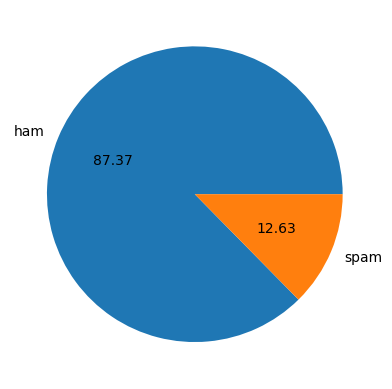

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
#data is imbalanced
#import nltk(natural language tool kit) to store total characters,words and sentences in the sms in three diff. columns 

In [18]:
import nltk


In [19]:
!pip install nltk


In [20]:
nltk.download('punkt')    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters']= df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.966725,18.453279,1.947185
std,58.229529,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
#description for ham(0) messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.449513,17.120903,1.799601
std,56.352799,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
#description for spam(1) messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.869832,27.667688,2.967841
std,30.127081,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [28]:
# to compare ham and spam data draw histogram
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

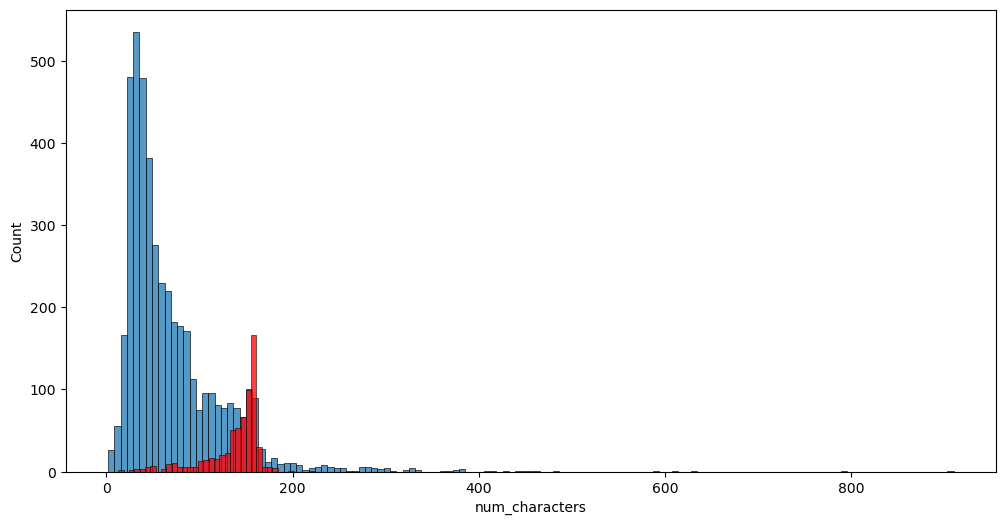

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

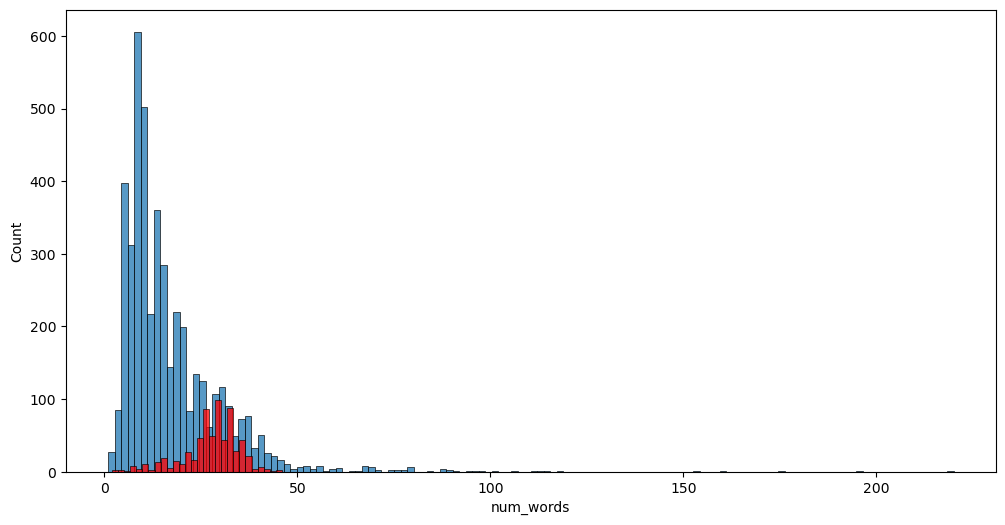

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

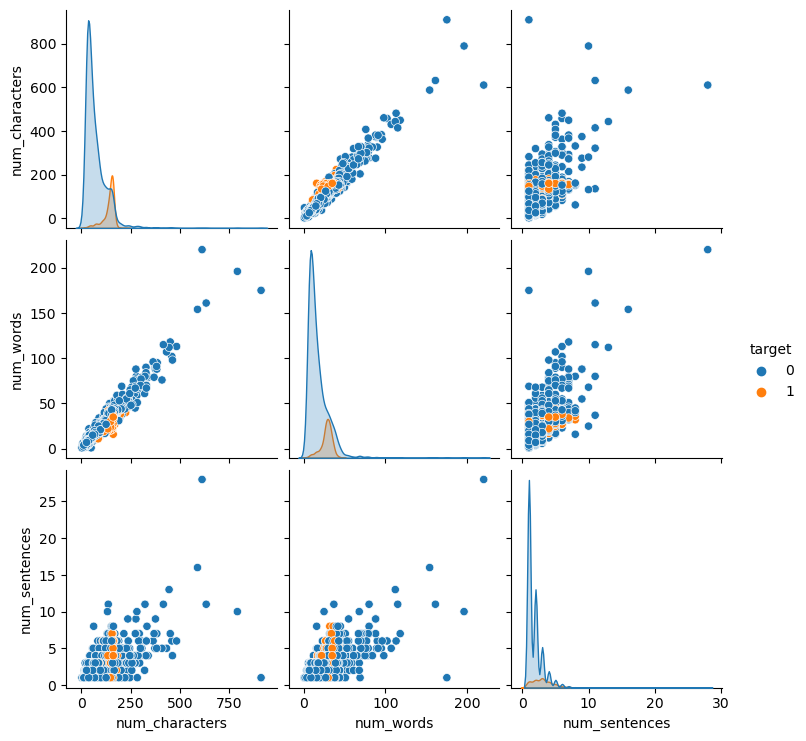

In [31]:
#for showing correlation b/w num_words,num_count,num_sentences
sns.pairplot(df,hue='target')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13228\412671951.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

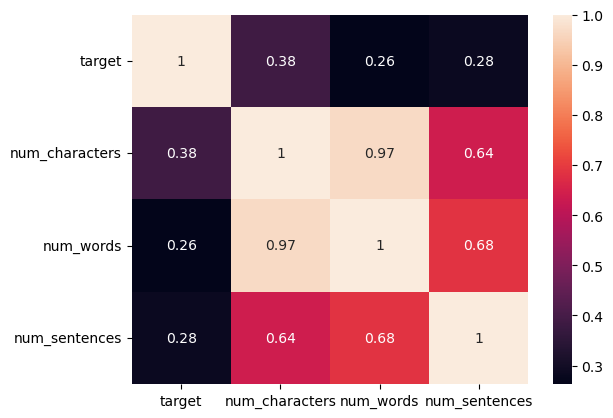

In [32]:
#correlation cofficients b/w parameters
sns.heatmap(df.corr(),annot=True)

## 3. Data preprocessing
-> lower case
-> Tokenization
-> Removing special characters 
-> removing stop words and punctuation
-> stemming


In [33]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

In [39]:
#  stopwords in english language are:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
#the punctuations which can be used in a sentence
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
#for stemming the words in the sms i.e. relating the word to the root word from which it is formed eg:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [41]:
transform_text('i Loved the serVICE to the NATIOn and defending It.what about you?')

'love servic nation defend'

In [42]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [43]:
#storing the transformed text(after preprocessing) from text into a new column having name as transformed text
df['transformed_text']=df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
#we will use wordcloud(already in anaconda) which will show most repeated words in ham and spam messages and will make an object wc for its usage
!pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

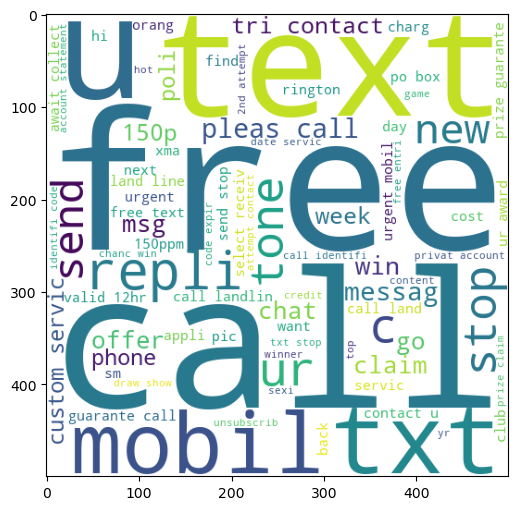

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

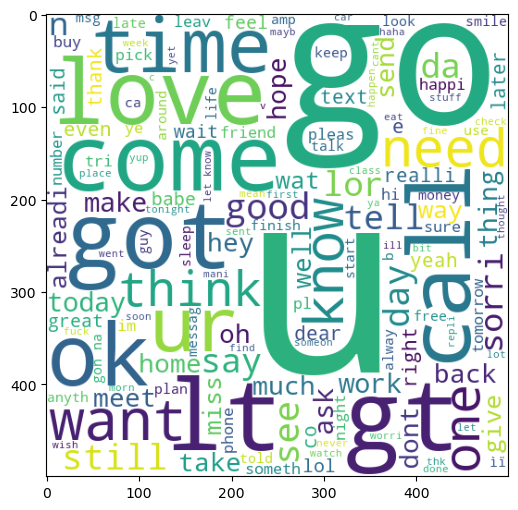

In [47]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
#extracting 30 most repeated words in the spam category by dividing all spam messages in words
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [50]:
len(spam_corpus)

9939

In [51]:
from collections import Counter
Counter(spam_corpus).most_common(30)
#it will create  a dictionary having count of each word that how many time it gets repeated in spam_corpus

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

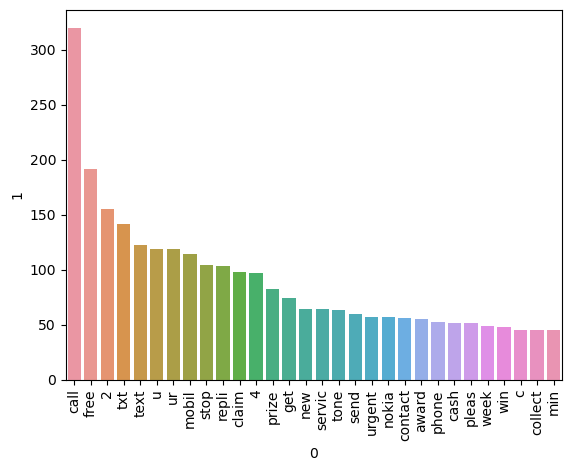

In [52]:
pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
#extracting 30 most repeated words in the ham category by dividing all ham messages in words
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

35394

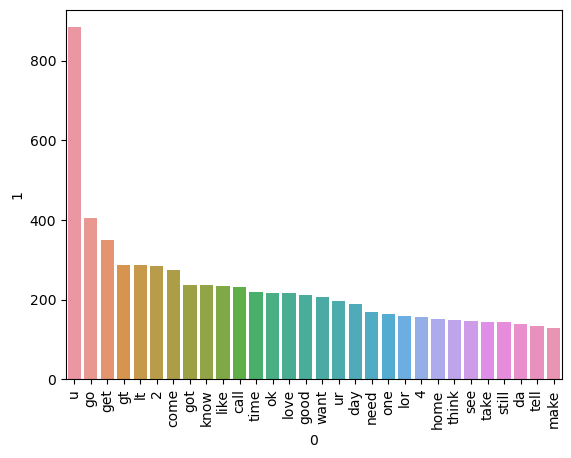

In [55]:
pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#### 4. Model Building


In [56]:
# we will use 'Naive-bayes' algo here bcz it works best on textual data
# Text vectorization(on transformed_text column bcz this is input of our spam detection model) will be done using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [58]:
x=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
x.shape


(5169, 6706)

In [60]:
y=df['target'].values

In [61]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
from sklearn.model_selection import train_test_split


In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
#because this is imbalance data so we need high precision score hence we have imported three diff. naive bayes techniques to see their respective accuracy and precision

In [65]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [66]:
# checking accuracy and precision through Gaussian naive bayes
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [67]:
# checking accuracy and precision through Multinomial naive bayes
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [68]:
# checking accuracy and precision through Bernoulli naive bayes
#precision score matters more than accuracy bcz this is imbalanced data so we needed high precision here hence checking through multiple techniques
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [69]:
X.shape

(5169, 3000)

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
# checking accuracy and precision through Gaussian naive bayes when using tfidf vectoriser and not countvectorizer
gnb.fit(X_train,y_train)
y_pred4=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.8713733075435203
[[790 106]
 [ 27 111]]
0.511520737327189


In [72]:
# checking accuracy and precision through Multinomial naive bayes when using tfidf vectoriser and not countvectorizer
mnb.fit(X_train,y_train)
y_pred5=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [73]:
# checking accuracy and precision through Bernoulli naive bayes when using tfidf vectoriser and not countvectorizer
bnb.fit(X_train,y_train)
y_pred6=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [74]:
# so as it is imbalanced data so precision score matters more hera and we have highest precision score in multinomial naive bayes with tfidf vectorization
#now compairing this accuracy and precision of multinomial naive bayes with other algorithms modules

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [76]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc= BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)

In [77]:
clfs={
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt 
}

In [78]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    
    return accuracy,precision

In [79]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [80]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision= train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy ",current_accuracy)
    print("precision ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy  0.9758220502901354
precision  0.9747899159663865
For  KN
Accuracy  0.9052224371373307
precision  1.0
For  NB
Accuracy  0.9709864603481625
precision  1.0
For  DT
Accuracy  0.9284332688588007
precision  0.82
For  LR
Accuracy  0.9584139264990329
precision  0.9702970297029703
For  RF
Accuracy  0.9748549323017408
precision  0.9912280701754386
For  AdaBoost
Accuracy  0.9642166344294004
precision  0.954954954954955
For  BgC
Accuracy  0.9613152804642167
precision  0.8769230769230769
For  ETC
Accuracy  0.9796905222437138
precision  0.975609756097561
For  GBDT
Accuracy  0.9477756286266924
precision  0.9285714285714286


In [81]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)

In [82]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.991228
8,ETC,0.979691,0.975610
0,SVC,0.975822,0.974790
4,LR,0.958414,0.970297
6,AdaBoost,0.964217,0.954955
9,GBDT,0.947776,0.928571
7,BgC,0.961315,0.876923
3,DT,0.928433,0.820000


In [83]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [84]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,ETC,Accuracy,0.979691
4,SVC,Accuracy,0.975822
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.964217
7,GBDT,Accuracy,0.947776
8,BgC,Accuracy,0.961315
9,DT,Accuracy,0.928433


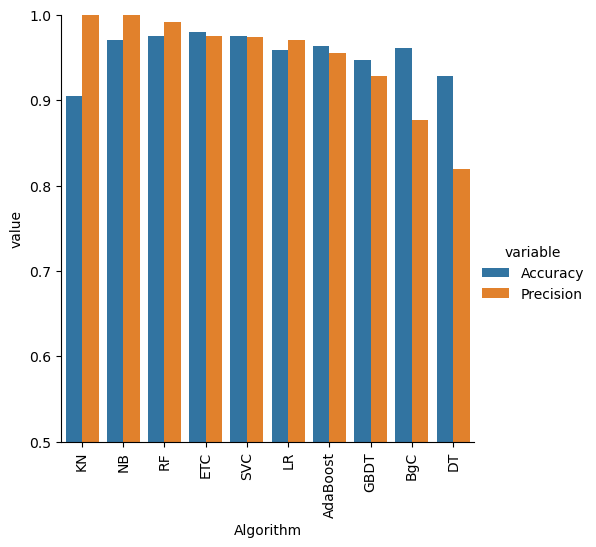

In [85]:
sns.catplot(x='Algorithm', y= 'value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [86]:
# model improve
# 1. change the max_features parameter of tfidf(i.e. do improvement by adding max_feature=3000 in TfidfVectorizer in model building section(4))

In [87]:
temp_df= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending = False)

In [88]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.991228,0.974855,0.991228
3,ETC,0.979691,0.975610,0.979691,0.975610
4,SVC,0.975822,0.974790,0.975822,0.974790
5,LR,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.964217,0.954955,0.964217,0.954955
7,GBDT,0.947776,0.928571,0.947776,0.928571
8,BgC,0.961315,0.876923,0.961315,0.876923
9,DT,0.928433,0.820000,0.928433,0.820000


In [89]:
#voting classifier(to use multiple algorithms together(ensembling of diff. algos) to check change in accuracy and precision)
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [90]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [91]:
voting.fit(X_train,y_train)
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.983739837398374


In [92]:
# Applying stacking(a method for ensembling different algos to check change in accuracy and precision)
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [93]:
from sklearn.ensemble import StackingClassifier

In [94]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [95]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9615384615384616


In [96]:
# so as we can see precision and accuracy is most correct when we used TfidfVectorizer(max_features=3000) for converting text into numeric form and multinomial naive bayes algorithm
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))